# Historical forecast

Our time series model offers a powerful feature that allows users to retrieve historical forecasts alongside the prospective predictions. This functionality is accessible through the forecast method by setting the add_history=True argument.

In [ ]:
#| hide
from nixtlats.utils import colab_badge

In [ ]:
#| echo: false
colab_badge('docs/tutorials/7_historical_forecast')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/tutorials/7_historical_forecast.ipynb)

In [ ]:
#| hide
from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()

True

In [ ]:
import pandas as pd
from nixtlats import NixtlaClient

In [ ]:
nixtla = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

In [ ]:
#| hide
nixtla = NixtlaClient()

Now you can start to make forecasts! Let's import an example:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


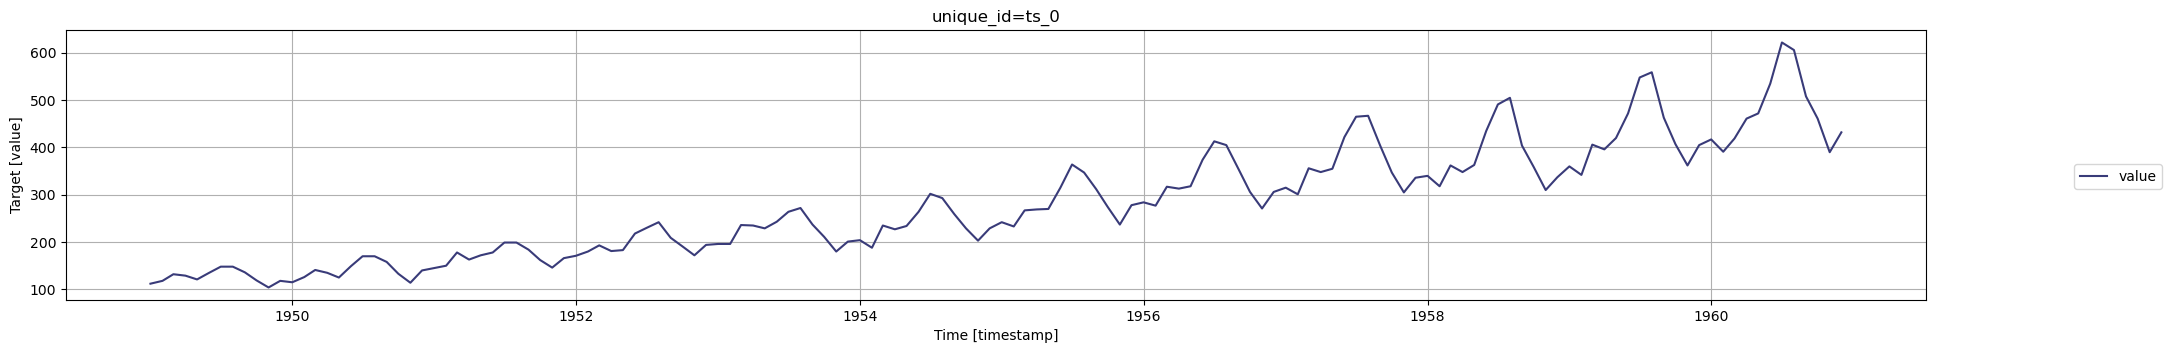

In [ ]:
nixtla.plot(df, time_col='timestamp', target_col='value')

Let's add fitted values. When `add_history` is set to True, the output DataFrame will include not only the future forecasts determined by the h argument, but also the historical predictions. Currently, the historical forecasts are not affected by `h`, and have a fix horizon depending on the frequency of the data. The historical forecasts are produced in a rolling window fashion, and concatenated.

In [ ]:
timegpt_fcst_with_history_df = nixtla.forecast(
    df=df, h=12, time_col='timestamp', target_col='value',
    add_history=True,
)

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Inferred freq: MS
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Calling Historical Forecast Endpoint...


In [ ]:
timegpt_fcst_with_history_df.head()

,timestamp,TimeGPT
0,1951-01-01,135.483673
1,1951-02-01,144.442413
2,1951-03-01,157.191910
3,1951-04-01,148.769379
4,1951-05-01,140.472946


Let's plot the results. This consolidated view of past and future predictions can be invaluable for understanding the model's behavior and for evaluating its performance over time.

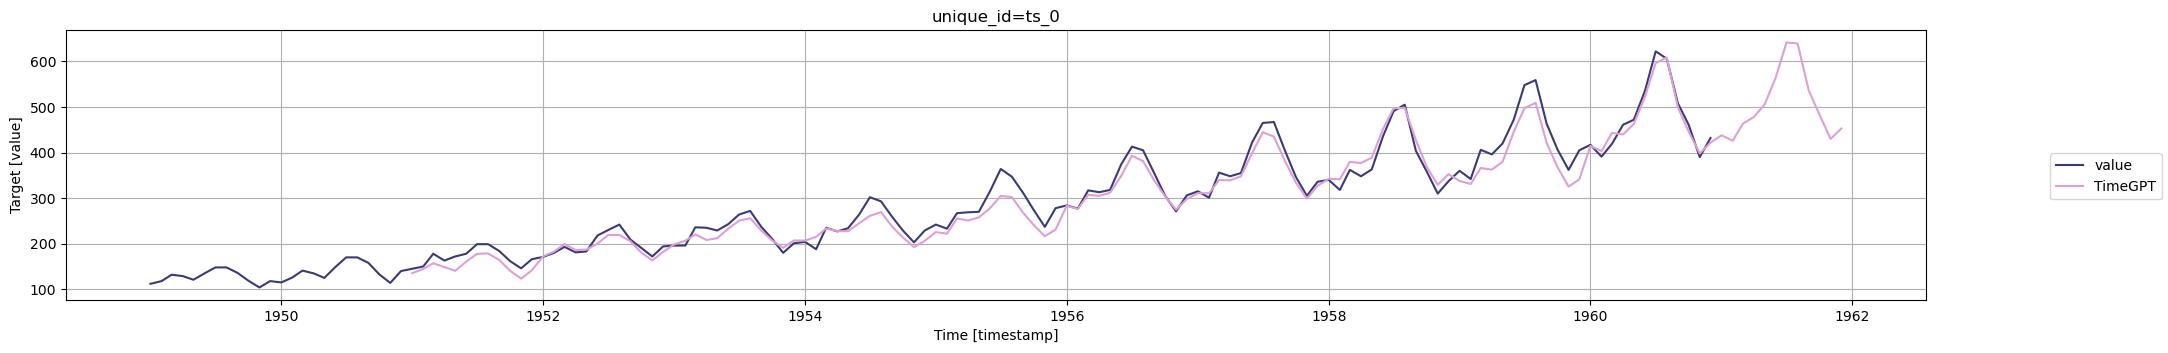

In [ ]:
nixtla.plot(df, timegpt_fcst_with_history_df, time_col='timestamp', target_col='value')

Please note, however, that the initial values of the series are not included in these historical forecasts. This is because our model, `TimeGPT`, requires a certain number of initial observations to generate reliable forecasts. Therefore, while interpreting the output, it's important to be aware that the first few observations serve as the basis for the model's predictions and are not themselves predicted values.